In [ ]:
import pyclesperanto as cle
from skimage.io import imread, imsave
import numpy as np
import matplotlib

### What devices are available and selecting devices

In [ ]:
cle.list_available_devices()

In [ ]:
cle.info() #global information about the GPUs available

In [ ]:
# initialize GPU; use everytime
device = cle.select_device("NVIDIA") #If multiple types of GPUs were available, can select a specific one with a string (will match)
#cle.select_device(1, device_type="gpu") #Alt way of selecting the GPU
#print("Used GPU: ", device)

### Sending data to the GPU

#### Can create space to use on the GPU

In [ ]:
empty_array = cle.create((128,128), dtype=np.float32) #dtype can be specified if wanted (64-bit not supported)
empty_array #array of the specified shape and dtype but filled with 0

#### Sending existing data to the GPU (Push)

In [ ]:
#Array of random ints
array = np.random.random((128,128)).astype(np.float32)
print(type(array), array.shape, array.dtype)

In [ ]:
random_array = cle.push(array)
random_array #calling the array makes a super awesome visual automatically!

#### Pull data off GPU

In [ ]:
read_array = cle.pull(random_array)
print(type(read_array), read_array.shape, read_array.dtype)

# Processing Data on GPU

#### Simple Processing (Crops, flips, pasting)

In [ ]:
image = cle.push(imread('https://samples.fiji.sc/blobs.png').squeeze())
image

In [ ]:
help(cle.crop) #get help for a command

##### Cropping a 75x75 area at (10,10)

In [ ]:
width, height = 75, 75
x, y = 10, 10
tile = cle.crop(image, start_x=x, start_y=y, width=width, height=height)
tile

##### Pasting the cropped data into a new array

In [ ]:
collage = cle.create((width*2+6, height*2+6), dtype=tile.dtype)
collage.fill(255) #fills array with a 'white' background
collage

In [ ]:
help(cle.paste)

In [ ]:
cle.paste(tile, collage, 2, 2) 
#Repeating this function with different values pastes the data 
#into the previous result i.e., the empty collage is not remade

In [ ]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flipped_tile, collage, width+4, 2)
collage

In [ ]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flipped_tile, collage, width+4, height+4)
collage

In [ ]:
flipped_tile = cle.flip(tile, flip_x=False, flip_y=True)
cle.paste(flipped_tile, collage, 2, height+4)
collage

In [51]:
read_array = cle.pull(collage)
read_array = cle.pull(flipped_tile)
read_array = cle.pull(image)
read_array = cle.pull(tile)

### Math Operations

In [52]:
import pyclesperanto as cle
import numpy as np

cle.get_device() # default device initialisation

(OpenCL) NVIDIA RTX A4000 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              572.83
	Device Type:                 GPU
	Compute Units:               48
	Global Memory Size:          16375 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4093 MB
	Max Clock Frequency:         1560 MHz
	Image Support:               Yes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32, mtype=buffer)
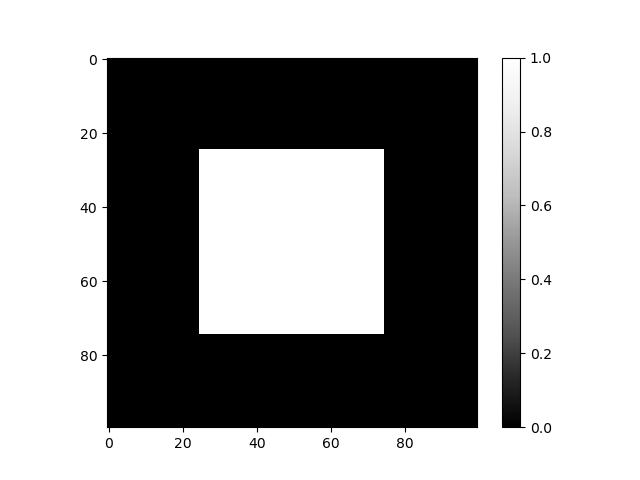
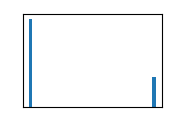

In [53]:
arr = np.zeros((100,100))
arr[25:75, 25:75] = 1
gpu_arr = cle.push(arr)
gpu_arr

#### Logical functions:
- array > x (cle.greater_constant)
- array >= x (cle.greater_or_equal_constant)
- array < x (cle.smaller_constant)
- array <= x (cle.smaller_or_equal_constant)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
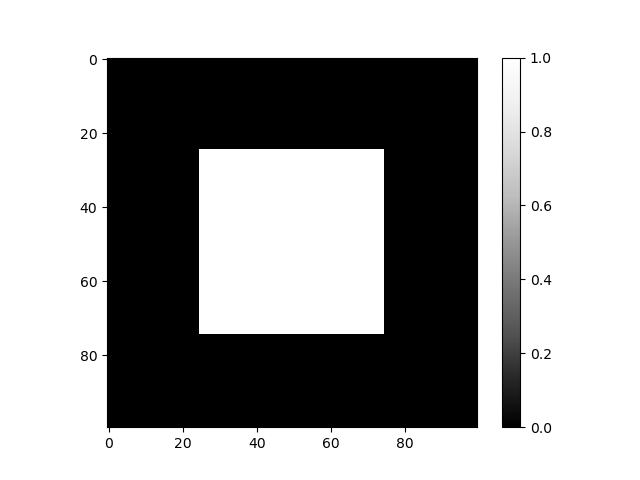
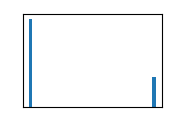

In [54]:
binary_arr = (gpu_arr == 1)
binary_arr

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8, mtype=buffer)
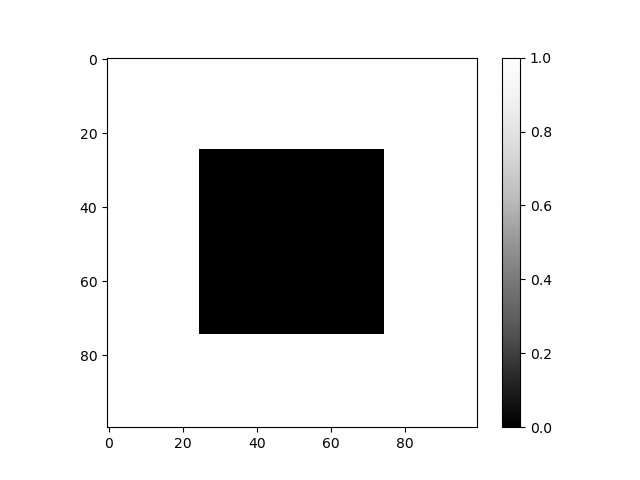
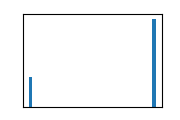

In [55]:
another_binary_image = (binary_arr == 0)
another_binary_image

#### Scalar functions:
- array * x (cle.multiply_image_and_scalar)
- array / x (cle.divide_scalar_by_image)
- array + x (cle.add_image_and_scalar)
- array - x (cle.subtract_image_from_scalar)

array([[12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       ...,
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12]], dtype=uint8, mtype=buffer)
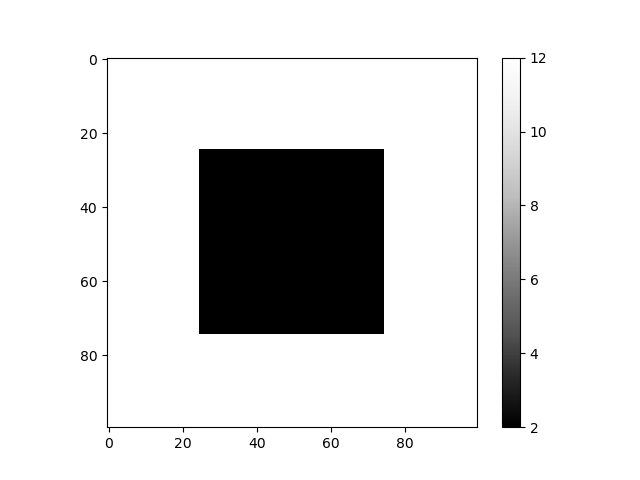
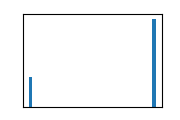

In [58]:
grayscal_image = (another_binary_image*50+10)/5
grayscal_image

#### Operations with Arrays
- arr * array (cle.multiply_images)
- arr - array (cle.subtract_images)
- arr / array (cle.divide_images)
- arr + array (cle.add_images)
- arr > array (cle.greater)
- arr >= array (cle.greater_or_equal)
- arr < array (cle.smaller)
- arr <= array (cle.smaller_or_equal)
- arr == array (cle.equal)

Note on optimization: For better memory management and speed optimization, it is recommended to rely on function (e.g. cle.multiply_images, etc.) instead of the operators if resources are limtied.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
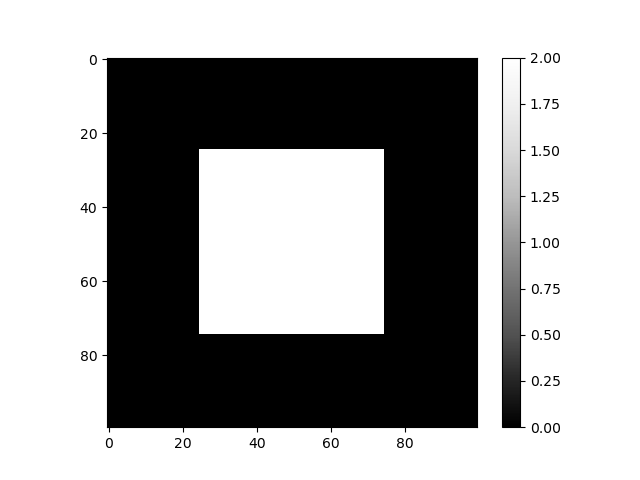
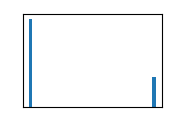

In [59]:
multiplied_array = grayscal_image * binary_arr
multiplied_array

array([[12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       ...,
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.]], dtype=float32, mtype=buffer)
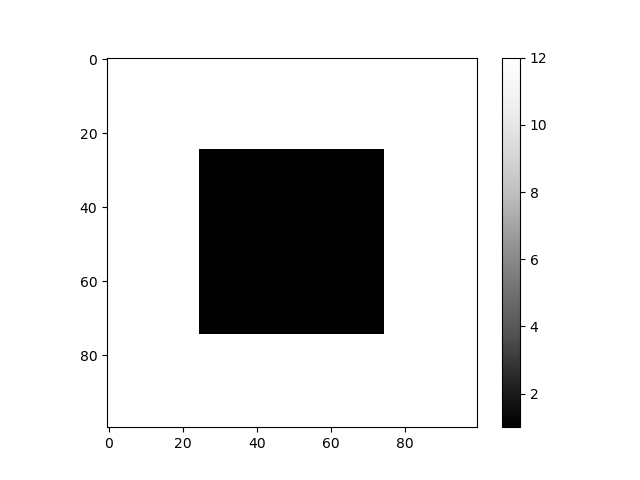
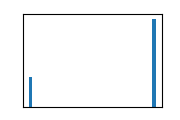

In [60]:
subtracted_array = grayscal_image - binary_arr
subtracted_array

## Matrix Multiplication

In [62]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

cle.select_device('NVIDIA') # default initialization

(OpenCL) NVIDIA RTX A4000 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              572.83
	Device Type:                 GPU
	Compute Units:               48
	Global Memory Size:          16375 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4093 MB
	Max Clock Frequency:         1560 MHz
	Image Support:               Yes

In [63]:
array1 = np.asarray([1, 2, 3, 4, 5])
array2 = np.asarray([6, 7, 8, 9, 10])

vector1 = cle.push(array1)
vector2 = cle.push(array2)

**In order to multiplicate matrices, the input matrices must be of size (n * m) and (m * n)**
Therefore, we transpose one of our vectors:

In [64]:
vector1_t = cle.transpose_xy(vector1)

print("Vector 1 (transposed): " + str(vector1_t))
print("Vector 2: " + str(vector2))

Vector 1 (transposed): [[1]
 [2]
 [3]
 [4]
 [5]]
Vector 2: [ 6  7  8  9 10]


In [65]:
matrix = cle.multiply_matrix(vector1_t, vector2)

print(matrix)

[[ 6.  7.  8.  9. 10.]
 [12. 14. 16. 18. 20.]
 [18. 21. 24. 27. 30.]
 [24. 28. 32. 36. 40.]
 [30. 35. 40. 45. 50.]]


C:\ProgramData\anaconda3\envs\cle\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


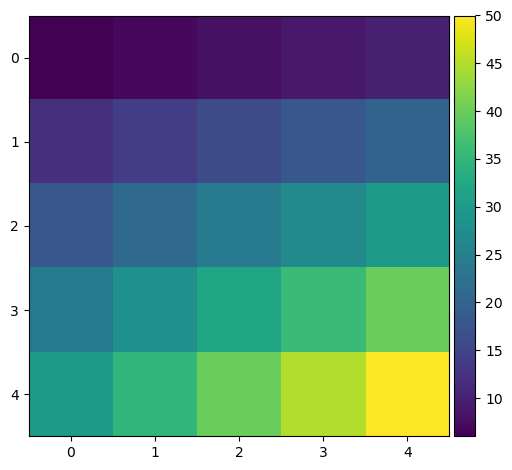

In [66]:
imshow(matrix)

[[ 0.41473538  3.6062353   2.5677967   0.06447735  0.7195655 ]
 [ 8.924708   10.089663    5.4481134   8.124495   16.147964  ]
 [ 0.43985695  2.7657988   2.5112038   6.4456296  28.469168  ]
 [14.824368   27.542568    7.7397633  32.884617    6.761094  ]
 [11.323717   18.623734    6.127417   40.072937   20.90673   ]]


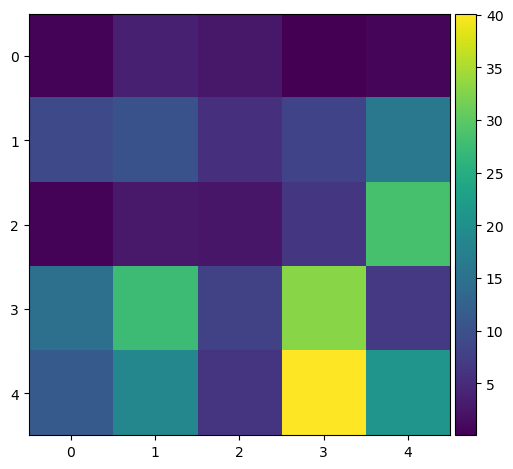

In [67]:
# generate another matrix of the same size with random values
another_matrix = cle.push(np.random.random(matrix.shape))

# element by element multiplication
matrix_element_wise_multiplied = cle.multiply_images(matrix, another_matrix)

print(matrix_element_wise_multiplied)

imshow(matrix_element_wise_multiplied)

In [68]:
elements_times_2 = cle.multiply_image_and_scalar(matrix, scalar=2)
print(elements_times_2)

[[ 12.  14.  16.  18.  20.]
 [ 24.  28.  32.  36.  40.]
 [ 36.  42.  48.  54.  60.]
 [ 48.  56.  64.  72.  80.]
 [ 60.  70.  80.  90. 100.]]


### 3D Vector and Matrices operations
When dealing with three dimensional point coordinates, it is mandatory to take the voxel size into account, e.g. for measuring distances between points. This example shows how to multiply a ***list of coordinates*** by a given voxel size.

In [69]:
voxel_size = np.asarray([[0.2], [0.2], [0.5]])
gpu_voxel_size = cle.push(voxel_size)

print(f"Array shape: {voxel_size.shape}")
print(f"GPU array shape: {gpu_voxel_size.shape}")

Array shape: (3, 1)
GPU array shape: (3, 1)


In [70]:
pointlist = np.asarray(
    [
        [1, 3,  5, 11], # X
        [0, 6,  1, 2 ], # Y
        [9, 11, 6, 2 ]  # Z
    ]
)
gpu_pointlist = cle.push(pointlist)

print(f"Array shape: {pointlist.shape}")
print(f"GPU array shape: {gpu_pointlist.shape}")

Array shape: (3, 4)
GPU array shape: (3, 4)


In [71]:
print(gpu_voxel_size)

[[0.2]
 [0.2]
 [0.5]]


In [72]:
print(gpu_pointlist)

[[ 1  3  5 11]
 [ 0  6  1  2]
 [ 9 11  6  2]]


In [73]:
gpu_updated_pointlist = cle.multiply_images(gpu_pointlist, gpu_voxel_size)
#similar to scaling the image
print(gpu_updated_pointlist)

[[0 0 1 2]
 [0 1 0 0]
 [4 5 3 1]]
